In [8]:
import os
import json
import time
import matplotlib.pyplot as plt
from openai import OpenAI

In [9]:
# Constants
MODEL_NAME = "ft:gpt-4o-mini-2024-07-18:defytek-sas:azteca3:AYhVjuWH"
LATENCY_DATASET_PATH = "test_azteca_v1.jsonl"
API_KEY_ENV_VAR = "GIK_OPEN_AI"

In [10]:
# Initialize OpenAI client
def get_openai_client(api_key_env_var):
    api_key = os.getenv(api_key_env_var)
    if not api_key:
        raise ValueError(f"API key not found in environment variable '{api_key_env_var}'")
    return OpenAI(api_key=api_key)

In [11]:
# Test API connection
def test_openai_connection(client):
    try:
        response = client.chat.completions.create(
            model=MODEL_NAME,
            messages=[
                {
                    "role": "system",
                    "content": (
                        "Tu nombre es Raúl y trabajas para Cumplir SAS. Tu tarea es comunicarte con los clientes "
                        "con alta empatía y comprensión. Nombre Banco: Banco Azteca. Nombre Cliente: David Cortés. "
                        "Monto Adeudado: 34384 pesos mexicanos. Fecha y hora de hoy: martes 2024-05-28 05:53 PM. "
                        "Días de atraso en el pago: 42. Fecha de pago máxima: miércoles 2024-05-29."
                    ),
                },
                {"role": "user", "content": "bueno"},
            ],
        )
        print("Connection test successful!")
        print("Model response:", response.choices[0].message.content)
    except Exception as e:
        print(f"Error connecting to OpenAI API: {e}")
        raise

In [12]:
# Load dataset
def load_dataset(filepath):
    try:
        with open(filepath, 'r') as file:
            return [json.loads(line) for line in file]
    except FileNotFoundError:
        raise ValueError(f"Dataset file not found at path: {filepath}")

In [13]:
# Measure latency for each conversation
def measure_latencies(client, conversations):
    latencies = []
    for idx, conversation in enumerate(conversations):
        try:
            system_message = conversation['messages'][0]['content']
            user_message = conversation['messages'][1]['content']

            start_time = time.time()
            client.chat.completions.create(
                model=MODEL_NAME,
                messages=[
                    {"role": "system", "content": system_message},
                    {"role": "user", "content": user_message},
                ],
            )
            latency = time.time() - start_time
            latencies.append(latency)
        except Exception as e:
            print(f"Error processing conversation at index {idx}: {e}")
    return latencies

In [14]:
# Plot latencies
def plot_latencies(latencies):
    plt.hist(latencies, bins=7, color='blue', edgecolor='black')
    plt.title("Model Response Latency Histogram")
    plt.xlabel("Latency (seconds)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

Connection test successful!
Model response: Buenas tardes, ¿me comunico con David Cortés?
Loaded 48 conversations from dataset.
Measured latencies for 48 conversations.


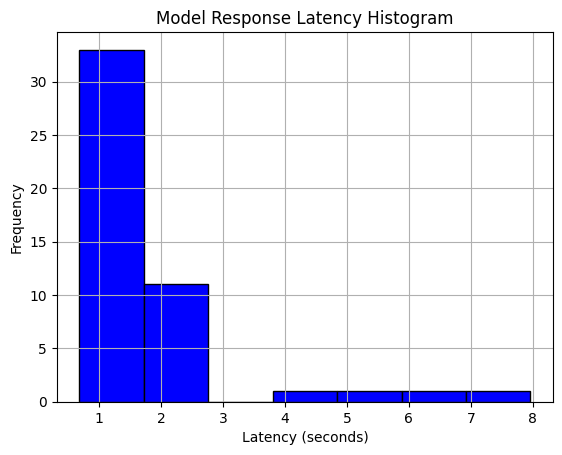

In [15]:
client = get_openai_client(API_KEY_ENV_VAR)
test_openai_connection(client)

conversations = load_dataset(LATENCY_DATASET_PATH)
print(f"Loaded {len(conversations)} conversations from dataset.")

latencies = measure_latencies(client, conversations)
print(f"Measured latencies for {len(latencies)} conversations.")

plot_latencies(latencies)